### Import libraries


let's start importing the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import seaborn as sns
import seaborn.objects as so

### Import DataFrame

and the database:

In [3]:
df=pd.read_csv(r"railway.csv")

### Preliminary Analysis

preliminar look at the database, top rows:

In [158]:
df.head()

Transaction ID Date of Purchase Time of Purchase Purchase Type  \
0  da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11        Online   
1  b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01       Station   
2  f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27        Online   
3  b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36       Station   
4  2be00b45-0762-485e-a7a3       2023-12-27         18:22:56        Online   

  Payment Method Railcard Ticket Class Ticket Type  Price  \
0    Contactless    Adult     Standard     Advance     43   
1    Credit Card    Adult     Standard     Advance     23   
2    Credit Card      NaN     Standard     Advance      3   
3    Credit Card      NaN     Standard     Advance     13   
4    Contactless      NaN     Standard     Advance     76   

       Departure Station    Arrival Destination Date of Journey  \
0      London Paddington  Liverpool Lime Street      2024-01-01   
1     London Kings Cross                   York      2024-01-01   
2  Liverpool Lime Street  Manchester Piccadilly      2024-01-02   
3      London Paddington                Reading      2024-01-01   
4  Liverpool Lime Street          London Euston      2024-01-01   

  Departure Time Arrival Time Actual Arrival Time Journey Status  \
0       11:00:00     13:30:00            13:30:00        On Time   
1       09:45:00     11:35:00            11:40:00        Delayed   
2       18:15:00     18:45:00            18:45:00        On Time   
3       21:30:00     22:30:00            22:30:00        On Time   
4       16:45:00     19:00:00            19:00:00        On Time   

  Reason for Delay Refund Request  
0              NaN             No  
1   Signal Failure             No  
2              NaN             No  
3              NaN             No  
4              NaN             No

object type of each column:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [5]:
df['Time of Purchase']=pd.to_datetime(df['Time of Purchase'], format='%H:%M:%S')
df['Departure Time']=pd.to_datetime(df['Departure Time'], format='%H:%M:%S')
df['Arrival Time']=pd.to_datetime(df['Arrival Time'], format='%H:%M:%S')
df['Actual Arrival Time']=pd.to_datetime(df['Actual Arrival Time'], format='%H:%M:%S')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       31653 non-null  object        
 1   Date of Purchase     31653 non-null  object        
 2   Time of Purchase     31653 non-null  datetime64[ns]
 3   Purchase Type        31653 non-null  object        
 4   Payment Method       31653 non-null  object        
 5   Railcard             10735 non-null  object        
 6   Ticket Class         31653 non-null  object        
 7   Ticket Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure Station    31653 non-null  object        
 10  Arrival Destination  31653 non-null  object        
 11  Date of Journey      31653 non-null  object        
 12  Departure Time       31653 non-null  datetime64[ns]
 13  Arrival Time         31653 non-

Replace Nan values with "None" in column "Railcard" 

In [7]:
df['Railcard'] = df['Railcard'].replace(np.nan, 'None')

Calculate delay as "Actual Arrival Time" - "Arrival Time"

In [8]:
data=df["Actual Arrival Time"]-df["Arrival Time"]
df["Delay"]=data / np.timedelta64(1, 'h')

Calculate journey time (h)

In [9]:
data=df["Actual Arrival Time"]-df["Departure Time"]
df["Journey Time"]=data / np.timedelta64(1, 'h')


number of rows and columns:

In [10]:
df.shape

(31653, 20)

let's extract the list of columns:

In [11]:
df.columns

Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Reason for Delay',
       'Refund Request', 'Delay', 'Journey Time'],
      dtype='object')

general statistics of each numerical variable  in the database:

In [167]:
df.describe()

Time of Purchase         Price  \
count                          31653  31653.000000   
mean   1900-01-01 11:56:47.955390976     23.439200   
min              1900-01-01 00:00:09      1.000000   
25%              1900-01-01 06:47:06      5.000000   
50%              1900-01-01 11:42:27     11.000000   
75%              1900-01-01 17:27:41     35.000000   
max              1900-01-01 23:59:57    267.000000   
std                              NaN     29.997628   

                      Departure Time                   Arrival Time  \
count                          31653                          31653   
mean   1900-01-01 12:01:51.856696064  1900-01-01 12:29:17.966069504   
min              1900-01-01 00:00:00            1900-01-01 00:00:00   
25%              1900-01-01 07:00:00            1900-01-01 07:50:00   
50%              1900-01-01 12:00:00            1900-01-01 12:05:00   
75%              1900-01-01 17:45:00            1900-01-01 18:15:00   
max              1900-01-01 23:45:00            1900-01-01 23:50:00   
std                              NaN                            NaN   

                 Actual Arrival Time         Delay  Journey Time  
count                          29773  29773.000000  29773.000000  
mean   1900-01-01 12:31:31.730091264      0.054161      0.501365  
min              1900-01-01 00:00:00      0.000000    -23.583333  
25%              1900-01-01 07:50:00      0.000000      0.500000  
50%              1900-01-01 12:20:00      0.000000      1.333333  
75%              1900-01-01 18:19:00      0.000000      1.500000  
max              1900-01-01 23:50:00      3.000000      4.800000  
std                              NaN      0.246176      4.169011

analysis of Nan values across the database:

presence of Nan in each column (there are Nan value in the database)

In [168]:
df.isna().any()

Transaction ID         False
Date of Purchase       False
Time of Purchase       False
Purchase Type          False
Payment Method         False
Railcard               False
Ticket Class           False
Ticket Type            False
Price                  False
Departure Station      False
Arrival Destination    False
Date of Journey        False
Departure Time         False
Arrival Time           False
Actual Arrival Time     True
Journey Status         False
Reason for Delay        True
Refund Request         False
Delay                   True
Journey Time            True
dtype: bool

Check duplicate rows: no duplicates

In [117]:
df[df.duplicated()]

Empty DataFrame
Columns: [Transaction ID, Date of Purchase, Time of Purchase, Purchase Type, Payment Method, Railcard, Ticket Class, Ticket Type, Price, Departure Station, Arrival Destination, Date of Journey, Departure Time, Arrival Time, Actual Arrival Time, Journey Status, Reason for Delay, Refund Request, Delay]
Index: []

Drop column Transaction ID

In [169]:
df.drop("Transaction ID", axis=1)
df.head(5)

Transaction ID Date of Purchase    Time of Purchase Purchase Type  \
0  da8a6ba8-b3dc-4677-b176       2023-12-08 1900-01-01 12:41:11        Online   
1  b0cdd1b0-f214-4197-be53       2023-12-16 1900-01-01 11:23:01       Station   
2  f3ba7a96-f713-40d9-9629       2023-12-19 1900-01-01 19:51:27        Online   
3  b2471f11-4fe7-4c87-8ab4       2023-12-20 1900-01-01 23:00:36       Station   
4  2be00b45-0762-485e-a7a3       2023-12-27 1900-01-01 18:22:56        Online   

  Payment Method Railcard Ticket Class Ticket Type  Price  \
0    Contactless    Adult     Standard     Advance     43   
1    Credit Card    Adult     Standard     Advance     23   
2    Credit Card     None     Standard     Advance      3   
3    Credit Card     None     Standard     Advance     13   
4    Contactless     None     Standard     Advance     76   

       Departure Station    Arrival Destination Date of Journey  \
0      London Paddington  Liverpool Lime Street      2024-01-01   
1     London Kings Cross                   York      2024-01-01   
2  Liverpool Lime Street  Manchester Piccadilly      2024-01-02   
3      London Paddington                Reading      2024-01-01   
4  Liverpool Lime Street          London Euston      2024-01-01   

       Departure Time        Arrival Time Actual Arrival Time Journey Status  \
0 1900-01-01 11:00:00 1900-01-01 13:30:00 1900-01-01 13:30:00        On Time   
1 1900-01-01 09:45:00 1900-01-01 11:35:00 1900-01-01 11:40:00        Delayed   
2 1900-01-01 18:15:00 1900-01-01 18:45:00 1900-01-01 18:45:00        On Time   
3 1900-01-01 21:30:00 1900-01-01 22:30:00 1900-01-01 22:30:00        On Time   
4 1900-01-01 16:45:00 1900-01-01 19:00:00 1900-01-01 19:00:00        On Time   

  Reason for Delay Refund Request     Delay  Journey Time  
0              NaN             No  0.000000      2.500000  
1   Signal Failure             No  0.083333      1.916667  
2              NaN             No  0.000000      0.500000  
3              NaN             No  0.000000      1.000000  
4              NaN             No  0.000000      2.250000

### Plotting and Analysis

Plot total revenue over time: we observe a decline in revenue between Feb 6 2024 and Feb 28 2024

In [19]:
data=df.groupby("Date of Purchase")["Price"].sum()
fig = px.line(data, x=data.index, y=data.values, title='Total Revenue')
fig.show()
fig.write_image("images/fig1.png")


In [16]:
df.groupby("Date of Purchase")["Price"].sum()

Date of Purchase
2023-12-08      43
2023-12-16      23
2023-12-19       3
2023-12-20      13
2023-12-27      76
              ... 
2024-04-26    6008
2024-04-27    6767
2024-04-28    6431
2024-04-29    6051
2024-04-30    3729
Name: Price, Length: 128, dtype: int64

Plot boxplot of Ticket Price: 

In [20]:
fig = px.box(df, y="Price", points="all", title="Ticket Price")
fig.show()
fig.write_image("images/fig2.png")

Plot boxlot of ticket prices, grouping by ticket class: standard class has median equal to 10 pounds, first class has median equal to 41 pounds

In [21]:
fig = px.box(df, y="Price", points="all",color="Ticket Class", title="Ticket Price")
fig.show()
fig.write_image("images/fig3.webp")

Same conclusions can be drawn plotting the histogram of ticket price, grouping by ticket class 

In [50]:
fig = px.histogram(df, x="Price", color= "Ticket Class", marginal="box")
fig.show()

Plot time of purchase and ticket price, including its histogram: we notice 3 peaks in tickets sold during the following periods, 8:07-08:22, 17:22-17:33 and 20:22-08:37 

In [104]:
fig = px.scatter(df, x="Time of Purchase", y="Price", marginal_x="histogram")
fig.show()

Compare purchase types: we see that customers prefer to buy tickets online

In [14]:
data=df["Purchase Type"].value_counts(sort=True,normalize=True)
fig = px.bar(data, x=data.index, y='proportion')
fig.show()

Compare payment methods: credit cards are the most common payment method, followed by contactless and debit card

In [15]:
data=df["Payment Method"].value_counts(sort=True,normalize=True)
fig = px.bar(data, x=data.index, y='proportion')
fig.show()

The most common purchase method is to buy tickets online using a credit card, as shown in the following plot

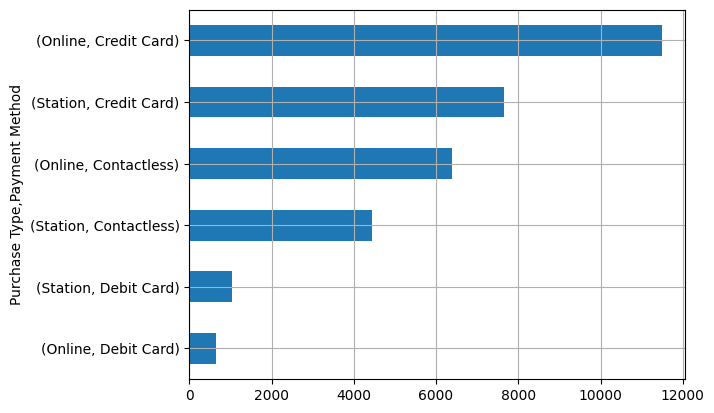

In [8]:
df.groupby(["Purchase Type","Payment Method"])["Price"].count().sort_values().plot(kind="barh")
plt.grid()

66% of all tickets are purchased without railcard, as shown by the following graph

In [135]:
data=df["Railcard"].value_counts(normalize=True)
fig = px.bar(data, x=data.index, y=data.values, title='Railcard')
fig.show()

The number of standard tickets (90%) is far greater than the number of first class tickets (10%)

In [136]:
data=df["Ticket Class"].value_counts(normalize=True)
fig = px.bar(data, x=data.index, y=data.values, title='Ticket Class')
fig.show()

Customers prefer to buy advance tickets, compared to off-peak and anytime tickets

In [137]:
data=df["Ticket Type"].value_counts(normalize=True)
fig = px.bar(data, x=data.index, y=data.values, title='Ticket Type')
fig.show()

Manchester Piccadilly Station features the highest number of departing trains 

In [144]:
data=df["Departure Station"].value_counts()
fig = px.bar(data, x=data.index, y=data.values, title='Departure Station')
fig.show()

Most revenues come from tickets sold for trains departing from the London Kings Cross Station

In [23]:
data=df.groupby("Departure Station")["Price"].sum().sort_values()
fig = px.bar(data, x=data.index, y='Price', title='Total Revenue')
fig.show()

87% of all trains are on time, 7% are delayed and 6% are cancelled

In [146]:
data=df["Journey Status"].value_counts(normalize=True)
fig = px.bar(data, x=data.index, y=data.values, title='Journey Status')
fig.show()

The most common reason for delay is weather, followed by technical issues and signal failure among others

In [44]:

data=df.groupby("Reason for Delay").size().sort_values()
fig = px.bar(data, x=data.index, y=data.values, title='Reason for Delay')
fig.show()

Plot histogram of delay (hours): delay ranges between 0 hours and 3 hours, with median equal to 0 hours

In [100]:
fig = px.histogram(df, x="Delay",marginal="box")
fig.show()

In [18]:
import os

if not os.path.exists("images"):
    os.mkdir("images")